# Legenda

## Preto = Títulos

## <font color='blue'>Azul = Comentários</font>

## <font color='red'>Vermelho = Respostas</font>

# Importação das bibliotecas utilizadas no código

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Leitura dos DataFrames

In [2]:
offSales=pd.read_json(r'offline_sales.json',lines=True)
offSales.head()

,customer_id,date,off_product_id,price,quantity,sale_id,state,store_id
0,NaN,2018-08-01,643839313230323,279.0,1,323932636465316,RN,3162633
1,NaN,2018-08-01,613665646663346,229.0,1,326463633336323,RN,3162633
2,NaN,2018-08-01,343739666265353,179.0,1,333331346330323,RN,3162633
3,NaN,2018-08-01,373034633762613,269.0,1,393461383633336,RN,3162633
4,NaN,2018-08-01,343634373062363,29.0,1,616531626536373,RN,3162633


In [3]:
onOrders = pd.read_json(r'online_orders.json',lines=True)
onOrders.head()

,customer_id,date,deviceType,on_product_id,order_id,price,quantity,visitor_id
0,NaN,2018-08-01,desktop,323762666337343,363063373630306,839,1,3.663324e+24
1,6.339334e+19,2018-08-01,mobile,313562333039323,356664366366353,629,1,3.430317e+24
2,3.765363e+19,2018-08-01,desktop,383863346531623,313432656633333,219,1,3.261343e+24
3,6.533383e+19,2018-08-01,mobile,666136386663626,633236633438383,239,1,6.437387e+24
4,NaN,2018-08-01,desktop,626533383465323,623030326130383,69,1,6.264657e+24


In [4]:
onPage = pd.read_json(r'online_pageviews.json',lines=True)
onPage.head()

,category_id,customer_id,date,deviceType,on_product_id,pageType,visitor_id
0,NaN,NaN,2018-08-01,desktop,NaN,home,6.162326e+24
1,NaN,NaN,2018-08-01,desktop,NaN,landing_page,3.538363e+24
2,6.161393e+09,NaN,2018-08-01,mobile,NaN,subcategory,3.130377e+24
3,6.664354e+09,NaN,2018-08-01,mobile,NaN,subcategory,3.130377e+24
4,NaN,NaN,2018-08-01,desktop,NaN,landing_page,3.235374e+24


## Verificação dos dados faltantes

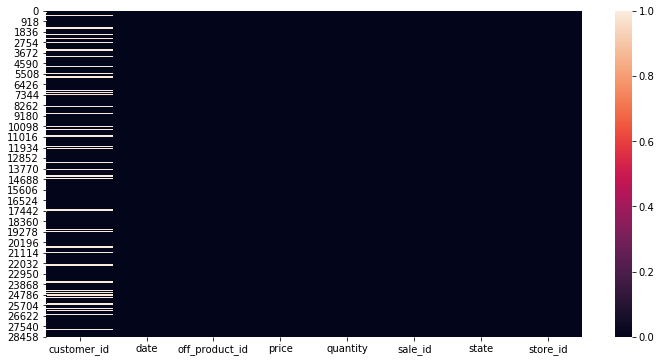

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(offSales.isnull())

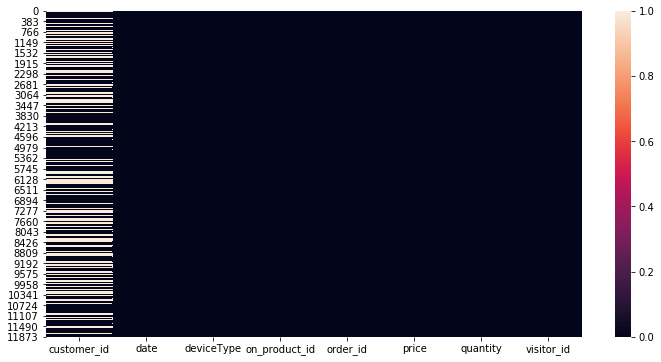

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(onOrders.isnull())

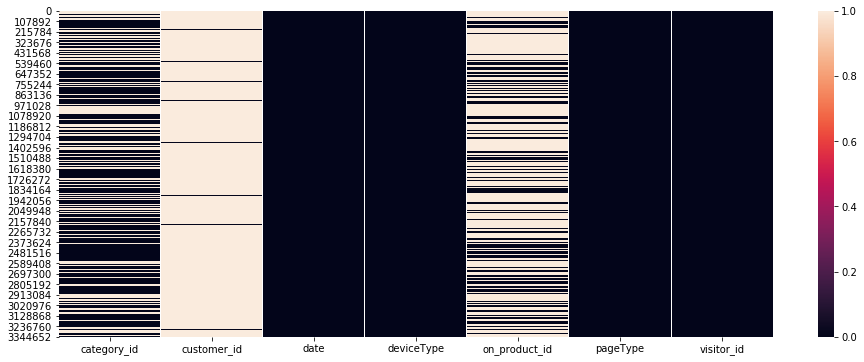

In [7]:
plt.figure(figsize=(16,6))
sns.heatmap(onPage.isnull())

## <font color='blue'>Os dados faltantes das compras são somente de ID do usuário e não afetarão as perguntas feitas (1 a 3)</font>

## Verificando descrição dos dados

In [8]:
offSales.describe()

,customer_id,off_product_id,price,quantity,sale_id,store_id
count,2.584400e+04,2.937200e+04,29372.000000,29372.000000,2.937200e+04,2.937200e+04
mean,4.582052e+19,4.540399e+14,468.062785,1.022743,4.593062e+14,4.380983e+06
std,1.428680e+19,1.422427e+14,819.182618,0.174934,1.426206e+14,1.314694e+06
min,3.030303e+19,3.030314e+14,0.010000,1.000000,3.030303e+14,3.161323e+06
25%,3.430314e+19,3.363346e+14,168.000000,1.000000,3.430624e+14,3.530643e+06
50%,3.830395e+19,3.765395e+14,289.000000,1.000000,3.830663e+14,3.639373e+06
75%,6.331634e+19,6.265626e+14,589.000000,1.000000,6.330303e+14,6.236393e+06
max,6.666667e+19,6.666663e+14,39690.000000,9.000000,6.666667e+14,6.637353e+06


In [9]:
onOrders.describe()

,customer_id,on_product_id,order_id,price,quantity,visitor_id
count,7.757000e+03,1.223700e+04,1.223700e+04,12237.000000,12237.000000,1.223700e+04
mean,4.610980e+19,4.557491e+14,4.603621e+14,461.047397,1.002452,4.549275e+24
std,1.428962e+19,1.415336e+14,1.427719e+14,481.098790,0.052656,1.423991e+24
min,3.030304e+19,3.030383e+14,3.030306e+14,19.000000,1.000000,3.030316e+24
25%,3.433646e+19,3.363643e+14,3.432317e+14,209.000000,1.000000,3.364323e+24
50%,3.830316e+19,3.765393e+14,3.832654e+14,359.000000,1.000000,3.762666e+24
75%,6.331323e+19,6.262643e+14,6.331323e+14,569.000000,1.000000,6.264373e+24
max,6.666647e+19,6.666653e+14,6.666663e+14,11190.000000,3.000000,6.666666e+24


## <font color='blue'>Os dados de quantidades estão como esperado (variando entre 0 e 9). Os dados de preço apresentam uma variação diferente, lojas fisicas parecem possuir produtos entre 0,01 e 40.000  enquanto as lojas online entre 19 e 11.000 (sem mais informações sobre a empresa sou incapaz de afirmar se isso é normal ou não)</font>

# 1) Qual foi o faturamento total no período?

In [10]:
offlineFaturamento = (offSales['price']*offSales['quantity']).sum()
offlineFaturamento

13903005.32

In [11]:
onlineFaturamento = (onOrders['price']*onOrders['quantity']).sum()
onlineFaturamento

5649323

In [12]:
faturamentoTotal = onlineFaturamento + offlineFaturamento
faturamentoTotal

19552328.32

## <font color='red'>O faturamento total no período analisado foi de R$ 19.552.328,32</font>

# 2) Qual o produto mais comprado online?

In [13]:
onOrders.head()

,customer_id,date,deviceType,on_product_id,order_id,price,quantity,visitor_id
0,NaN,2018-08-01,desktop,323762666337343,363063373630306,839,1,3.663324e+24
1,6.339334e+19,2018-08-01,mobile,313562333039323,356664366366353,629,1,3.430317e+24
2,3.765363e+19,2018-08-01,desktop,383863346531623,313432656633333,219,1,3.261343e+24
3,6.533383e+19,2018-08-01,mobile,666136386663626,633236633438383,239,1,6.437387e+24
4,NaN,2018-08-01,desktop,626533383465323,623030326130383,69,1,6.264657e+24


In [14]:
grupo = onOrders[['on_product_id','quantity']].groupby('on_product_id')

In [15]:
grupo.sum().sort_values('quantity',ascending=False).head()

,quantity
on_product_id,
626664333563363,74
376531636530353,51
656136316465643,50
396464373131666,47
343033316438393,45


## <font color='red'>O produto mais comprado foi o 626664333563363 com 74 compras</font>

# 3)Cariocas gostam de comprar no fim de semana?

In [16]:
offSales.head()

,customer_id,date,off_product_id,price,quantity,sale_id,state,store_id
0,NaN,2018-08-01,643839313230323,279.0,1,323932636465316,RN,3162633
1,NaN,2018-08-01,613665646663346,229.0,1,326463633336323,RN,3162633
2,NaN,2018-08-01,343739666265353,179.0,1,333331346330323,RN,3162633
3,NaN,2018-08-01,373034633762613,269.0,1,393461383633336,RN,3162633
4,NaN,2018-08-01,343634373062363,29.0,1,616531626536373,RN,3162633


In [17]:
dias = ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']

def dia_da_semana(y):
    x = y.dayofweek
    return dias[x]

In [18]:
semanaSales = offSales[offSales['state']=='RJ']['date'].apply(dia_da_semana).value_counts()
print(semanaSales.sum())
print()
print(offSales[offSales['state']=='RJ']['date'].count())
print()
semanaSales

8867

8867



Sexta      1809
Quinta     1805
Quarta     1518
Sábado     1445
Terça      1176
Segunda     836
Domingo     278
Name: date, dtype: int64

## <font color='blue'>O mês de agosto de 2018 teve 5 quartas, quintas e sextas e 4 segundas, terças, sábado e domingo. Será necessário fazer a média de compras de cada dia da semana para um resutaldo mais preciso</font>

In [19]:
semanaSalesM = semanaSales.copy()
semanaSalesM['Segunda'] = semanaSales['Segunda']*0.25
semanaSalesM['Terça'] = semanaSales['Terça']*0.25
semanaSalesM['Quarta'] = semanaSales['Quarta']*0.20
semanaSalesM['Quinta'] = semanaSales['Quinta']*0.20
semanaSalesM['Sexta'] = semanaSales['Sexta']*0.20
semanaSalesM['Sábado'] = semanaSales['Sábado']*0.25
semanaSalesM['Domingo'] = semanaSales['Domingo']*0.25
semanaSalesM

Sexta      361
Quinta     361
Quarta     303
Sábado     361
Terça      294
Segunda    209
Domingo     69
Name: date, dtype: int64

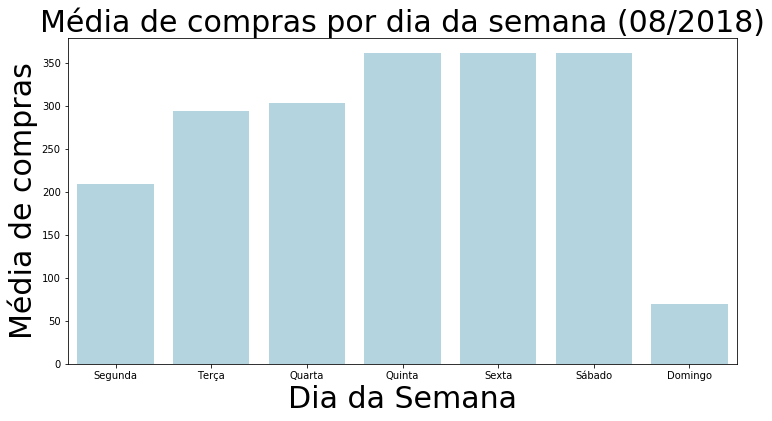

In [20]:
y = []
for i in dias:
    y.append(semanaSalesM[i])

plt.figure(figsize=(12,6))
sns.barplot(x=dias,y=y,color='#add8e6')
plt.title('Média de compras por dia da semana (08/2018)',size=30)
plt.xlabel('Dia da Semana', size = 30)
plt.ylabel('Média de compras', size = 30)
plt.rc('font', size=15)


#Estranho 3 Valores darem exatamente iguais.    

## <font color='red'>Olhando somente para o gráfico e para a tabela aparenta que os cariocas não gostam de comprar no domingo e compram bem no sábado. Porem por se tratar de lojas físicas pode ser que muitas só fiquem abertas até meio dia no sábado e/ou não abram no domingo ou só abram no domingo em ocasiões especiais. Portando o dado é inconclusivo quanto a preferência dos cariocas. A infomação mais correta é que há menos vendas no domingo e vendas normais no sábado.</font>

## <font color='blue'>Analisando se algumas lojas não abrem pelo final de semana</font>

In [21]:
offSales['day_of_week']=offSales['date'].apply(dia_da_semana)
offSales.head()

,customer_id,date,off_product_id,price,quantity,sale_id,state,store_id,day_of_week
0,NaN,2018-08-01,643839313230323,279.0,1,323932636465316,RN,3162633,Quarta
1,NaN,2018-08-01,613665646663346,229.0,1,326463633336323,RN,3162633,Quarta
2,NaN,2018-08-01,343739666265353,179.0,1,333331346330323,RN,3162633,Quarta
3,NaN,2018-08-01,373034633762613,269.0,1,393461383633336,RN,3162633,Quarta
4,NaN,2018-08-01,343634373062363,29.0,1,616531626536373,RN,3162633,Quarta


In [22]:
for i in dias:
    print(f"{offSales[offSales['day_of_week']==i]['store_id'].nunique()} lojas no Brasil venderam no dia da semana {i}")

39 lojas no Brasil venderam no dia da semana Segunda
39 lojas no Brasil venderam no dia da semana Terça
39 lojas no Brasil venderam no dia da semana Quarta
39 lojas no Brasil venderam no dia da semana Quinta
39 lojas no Brasil venderam no dia da semana Sexta
39 lojas no Brasil venderam no dia da semana Sábado
34 lojas no Brasil venderam no dia da semana Domingo


In [23]:
for i in dias:
    print(f"{offSales[(offSales['day_of_week']=='Quarta') & (offSales['state']=='RJ')]['store_id'].nunique()} lojas no Rio de Janeiro venderam no dia da semana {i}")

13 lojas no Rio de Janeiro venderam no dia da semana Segunda
13 lojas no Rio de Janeiro venderam no dia da semana Terça
13 lojas no Rio de Janeiro venderam no dia da semana Quarta
13 lojas no Rio de Janeiro venderam no dia da semana Quinta
13 lojas no Rio de Janeiro venderam no dia da semana Sexta
13 lojas no Rio de Janeiro venderam no dia da semana Sábado
13 lojas no Rio de Janeiro venderam no dia da semana Domingo


## <font color='red'>Existem lojas no Brasil que não apresentam vendas no Domingo. Porem o mesmo não é verdade quanto ao Rio de Janeiro. Todas as lojas do estado apresentam vendas em todos os dias da semana. Possívelmente cariocas não gostam de comprar no domingo. </font>

# 4)É comum escolher online e terminar a compra na loja física?

## <font color='blue'>Limpeza do DataSet. Os dados mais úteis são o ID do cliente que visitou o site e a data. Dessa forma é possível comparar se ele foi na loja depois de visitar o site.</font>

In [24]:
visitaSite = onPage[['customer_id','date']]

## <font color='blue'>Será elimado os dados faltantes de ID do cliente pois sem isso não é possível verificar se ele foi em uma loja física.</font>

In [25]:
visitaSite = visitaSite.dropna(subset=['customer_id'])

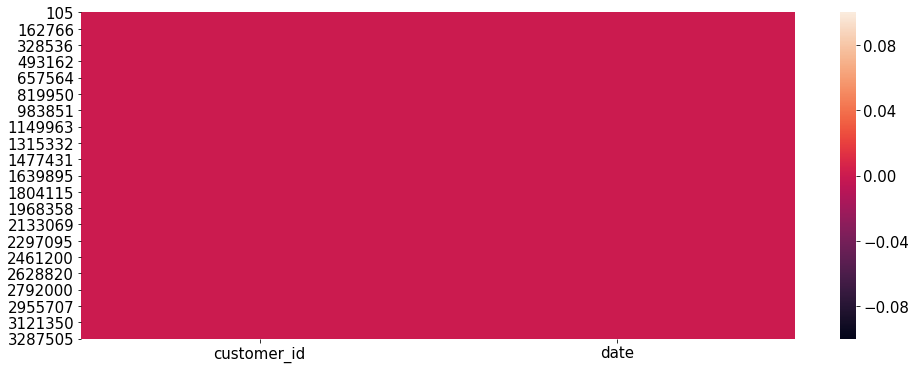

In [26]:
plt.figure(figsize=(16,6))
sns.heatmap(visitaSite.isnull())

In [27]:
visitaSite.nunique()['customer_id']

5913

In [28]:
visitaSite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80765 entries, 105 to 3452492
Data columns (total 2 columns):
customer_id    80765 non-null float64
date           80765 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 MB


## <font color='blue'>Limpeza dos dados</font>

In [29]:
comprasLoja = offSales[['customer_id','date']].dropna(subset=['customer_id'])

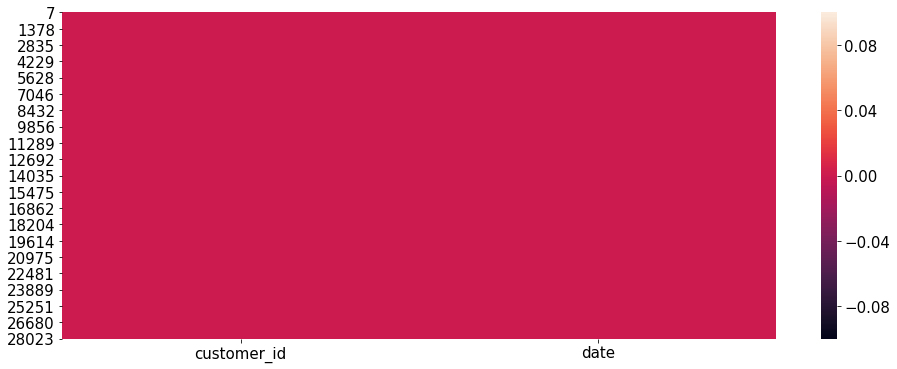

In [30]:
plt.figure(figsize=(16,6))
sns.heatmap(comprasLoja.isnull())

In [31]:
comprasLoja.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25844 entries, 7 to 29371
Data columns (total 2 columns):
customer_id    25844 non-null float64
date           25844 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 605.7 KB


## <font color='blue'>Verificando se pessoas que visitaram o site compraram na loja</font>

In [32]:
def esteve_loja(linha):
    """
    Essa função é responsável por procurar no dataframe de lojas físicas
    se pessoas que visitaram o site visitaram uma das lojas depois de ver o site
    
    Ela recebe o ID de quem comprou na loja e a data.
    Depois verifica se esse ID visitou o site.
    Se ele visitou o site a função verifica as datas que essa pessoal visitou 
    e compara se a data da visita foi anterior a compra na loja física.
    Se uma das visitas ao site foi anterior a visita em loja física a função retorna o ID do cliente.
    
    Como o período analisado é de somente 31 dias não foi colocado limite de tempo da visita no site para a visita na loja.
    Porem para tempos maiores seria bom limitar o tempo.
    """
    a = visitaSite[visitaSite['customer_id']==linha[0]]
    if len(a.index)>0:
        for i in a.index:
            if a['date'][i]<linha['date']:
                return a['customer_id'][a.index[0]]
                break

In [33]:
visita = comprasLoja.apply(esteve_loja,axis=1)

In [34]:
visita = visita.dropna()

In [35]:
visita.nunique()

398

In [36]:
conversao = visita.nunique()/visitaSite.nunique()['customer_id']
conversao

0.06730931845087096

## <font color='red'>Cerca de 6,7% das pessoas que tinha ID no site depois foram em uma loja física. Esse número pode parecer insignificante, porém há muito mais visitas no site do que compras na loja. Logo isso pode representar uma porção significativa das vendas. Se houvesse o ID de todas as pessoas que visitam o site e das pessoas que compram na loja poderiamos dizer com maior exatidão o número de vendas em lojas devido ao site.</font>

# 5)O time de marketing desta rede quer fazer uma campanha oferecendo um cupom de 20% nas compras de loja física para quem visitou o site e abandonou um carrinho com produtos. Estime o resultado dessa campanha.


## <font color='red'>O sucesso dessa campanha dependerá de diversos fatores. Como o fato da empresa ter ou não o e-mail ou telefone dessas pessoas para mandar a promoção, tendo em vista o fato que da maioria não possui nem o id do comprador. Além disso dependerá da época do mês e ano e da atratividade da propaganda.</font>

## <font color='blue'>Publico alvo da propaganda será somente as pessoas que possuem se possui o customer id pois esses possívelmente já possuem cadastro e assim pode ser enviado o anúncio.</font>

In [37]:
PAlvo = (onPage[['on_product_id','customer_id']]).dropna(subset=['on_product_id','customer_id'])

In [38]:
PAlvo.nunique()['customer_id']

1902

In [39]:
offSales['customer_id'].nunique()

9901

In [40]:
gastoPessoa = offlineFaturamento/offSales['customer_id'].nunique()
gastoPessoa

1404.2021331178669

In [41]:
projecao=PAlvo.nunique()['customer_id']*0.10*gastoPessoa*0.80
projecao

213663.39657521463

In [42]:
projecao/offlineFaturamento*100

1.536814463185537

## <font color='red'>Considerando 10% de conversão da camapanha teria um aumento no lucro de 213.663 considerando que as pessoas gastariam a média de um cliente normal menos 20% devido ao desconto. Isso representa um aumento no faturamento de 1.53%. O ideal seria utilizar dados de conversão de campanhas anteriores para uma analise mais precisa</font>

## <font color='blue'>Considerando que possam fazer essa promoção para todas as pessoas que visitaram o site. levando em conta o visitor_id e o carinho com algo</font>

In [43]:
PAlvo = (onPage[['on_product_id','visitor_id']]).dropna(subset=['on_product_id'])

In [44]:
PAlvo['visitor_id'].nunique()

468548

In [45]:
projecao = projecao=PAlvo.nunique()['visitor_id']*0.10*gastoPessoa*0.80
projecao

52634888.08544883

In [46]:
projecao/offlineFaturamento*100

378.58640541359466

## <font color='red'>Considerando 10% de conversão da camapanha teria um aumento no lucro de mais de 52.000.000 considerando que as pessoas gastariam a média de um cliente normal menos 20% devido ao desconto. Isso representa um aumento no faturamento de 378%. Esses números não condizem com a realidade, muito provavelmente porque uma mesma pessoa pode ter mais de um visitor_id além de a conversão não ser tão alta.</font>

# BÔNUS

# A quantidade de vezes que a pessoa visitou o site influência na compra?

## <font color='blue'>Verificando quantas vezes a pessoa visitou o site</font>

In [47]:
df = pd.DataFrame()

In [48]:
df['customer_id'] = onPage['customer_id'].dropna().unique()

In [49]:
IDVisitaSite = onPage['customer_id'].dropna()

In [50]:
df['n_visitas']=df['customer_id'].apply(lambda x: len(IDVisitaSite[IDVisitaSite==x]))
df.head()

,customer_id,n_visitas
0,3.334316e+19,50
1,3.235393e+19,36
2,3.765363e+19,88
3,3.165624e+19,17
4,3.635314e+19,372


## <font color='blue'>Verificando se a pessoa comprou na loja</font>

In [51]:
compraLoja = offSales['customer_id'].dropna()

In [52]:
df['compras_loja'] = df['customer_id'].apply(lambda x: len(compraLoja[compraLoja == x ]))
df.head()

,customer_id,n_visitas,compras_loja
0,3.334316e+19,50,0
1,3.235393e+19,36,0
2,3.765363e+19,88,14
3,3.165624e+19,17,0
4,3.635314e+19,372,0


## <font color='blue'>Verificando se a pessoa comprou no site</font>

In [53]:
comprouSite = onOrders['customer_id'].dropna()

In [54]:
df['compras_site'] = df['customer_id'].apply(lambda x: len(comprouSite[comprouSite == x ]))
df.head()

,customer_id,n_visitas,compras_loja,compras_site
0,3.334316e+19,50,0,0
1,3.235393e+19,36,0,1
2,3.765363e+19,88,14,9
3,3.165624e+19,17,0,0
4,3.635314e+19,372,0,11


## <font color='blue'>Coluna binária se comprou na loja ou no site</font>

In [55]:
df['comprou_loja_ou_site'] = df[['compras_loja','compras_site']].apply(lambda x:  1 if(x[0]>0 or x[1]>0) else 0, axis = 1)
df.head()

,customer_id,n_visitas,compras_loja,compras_site,comprou_loja_ou_site
0,3.334316e+19,50,0,0,0
1,3.235393e+19,36,0,1,1
2,3.765363e+19,88,14,9,1
3,3.165624e+19,17,0,0,0
4,3.635314e+19,372,0,11,1


## <font color='blue'>Analisando possível correlação entre os dados</font>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


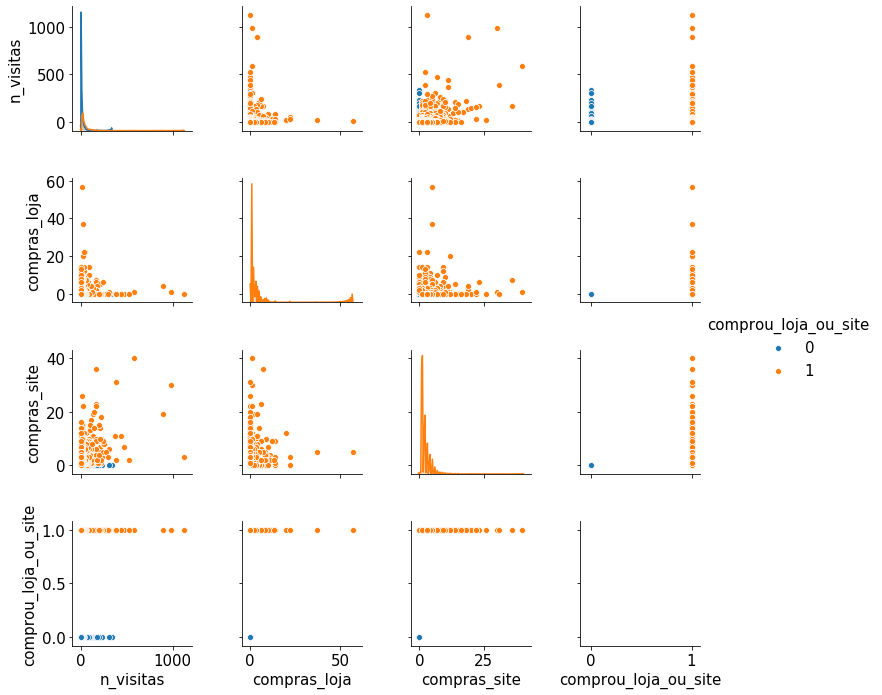

In [56]:
sns.pairplot(df.drop('customer_id',axis=1),hue='comprou_loja_ou_site')

## <font color='blue'>Importando biblioteca de machine learning</font>

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [58]:
x = df[['n_visitas']]
y = df[['comprou_loja_ou_site']]

In [59]:
x_train, x_teste, y_train, y_teste = train_test_split(x,y,test_size = 0.3)

In [60]:
logmodel= LogisticRegression()
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
predictions = logmodel.predict(y_teste)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_teste,predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       685
           1       0.61      1.00      0.76      1089

    accuracy                           0.61      1774
   macro avg       0.31      0.50      0.38      1774
weighted avg       0.38      0.61      0.47      1774



## <font color='red'>Considerando dados de customer_id não parece haver relação entre a quantidade de vezes que entrou no site e compras em lojas físicas ou online. Mais da metadde da base de dados que possuem o customer_id compraram na loja no mês, logo o modelo de machine learning chutou que todas as pessoas compraram e acertou mais da metade. Muito provavelmente os clientes que a loja possui o customer_id já são clientes fidelizados ou já possuem cadastro e por isso mais da metade comprou nesse mês ou as pessoas só fazem login quando vão comprar e somente dessa forma o sistema sabe o customer_id.</font>

# A quantidade de vezes que a pessoa visitou o site influência na compra online?

## <font color='blue'>Realizar o mesmo processo anterior para o visitor_ID.</font>

In [79]:
totalVisitorID = pd.DataFrame()
totalVisitorID = onPage['visitor_id'].dropna().unique()
totalVisitorID

array([6.16232623e+24, 3.53836303e+24, 3.13037664e+24, ...,
       6.16239643e+24, 6.43761314e+24, 3.83963323e+24])

## <font color='blue'>Utilizarei somente 20% dos dados pois meu computador levará muito tempo para processar todos os dados.</font>

In [112]:
parcial80 , parcial20 = train_test_split(totalVisitorID,test_size=0.2)
df = pd.DataFrame()
df['visitor_id'] = parcial20
df.head()

,visitor_id
0,3.036623e+24
1,3.339354e+24
2,3.136663e+24
3,6.661347e+24
4,6.537373e+24


In [113]:
IDVisitor =  onPage['visitor_id'].dropna()

In [114]:
df['n_visitas']=df['visitor_id'].apply(lambda x: len(IDVisitor[IDVisitor==x]))
df.head()

,visitor_id,n_visitas
0,3.036623e+24,1
1,3.339354e+24,1
2,3.136663e+24,2
3,6.661347e+24,2
4,6.537373e+24,2


In [115]:
comprouSite = onOrders['visitor_id'].dropna()

In [116]:
df['compras_site'] = df['visitor_id'].apply(lambda x: len(comprouSite[comprouSite == x ]))
df.head()

,visitor_id,n_visitas,compras_site
0,3.036623e+24,1,0
1,3.339354e+24,1,0
2,3.136663e+24,2,0
3,6.661347e+24,2,0
4,6.537373e+24,2,0


In [145]:
df['comprou_site'] = df['compras_site'].apply(lambda x: 1 if(x>0) else 0)
df.head()

,visitor_id,n_visitas,compras_site,comprou_site
0,3.036623e+24,1,0,0
1,3.339354e+24,1,0,0
2,3.136663e+24,2,0,0
3,6.661347e+24,2,0,0
4,6.537373e+24,2,0,0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


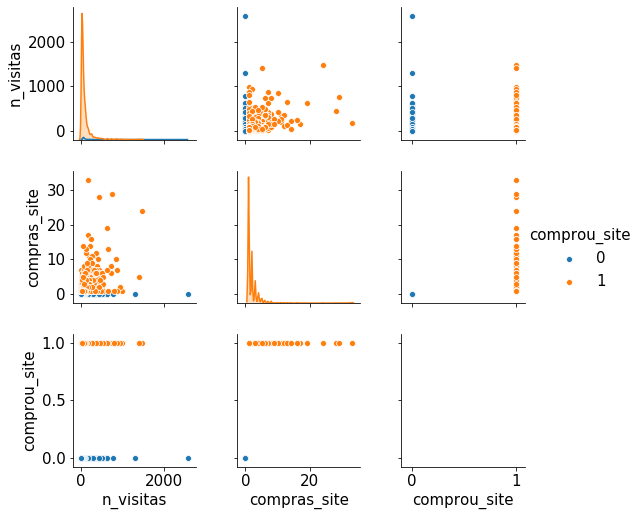

In [146]:
sns.pairplot(df.drop('visitor_id',axis=1),hue='comprou_site')

In [118]:
x = df[['n_visitas']]
y = df[['comprou_site']]

In [119]:
x_train, x_teste, y_train, y_teste = train_test_split(x,y,test_size = 0.3)

In [120]:
logmodel= LogisticRegression()
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
predictions = logmodel.predict(y_teste)

In [129]:
print(classification_report(y_teste,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     51505
           1       0.00      0.00      0.00       387

    accuracy                           0.99     51892
   macro avg       0.50      0.50      0.50     51892
weighted avg       0.99      0.99      0.99     51892



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## <font color='red'>Assim como o anterior o modelo não achou correlação entre os dados. Mas diferente do anterior havia mais dados de não compra, logo o modelo chutou que ninguém compraria e acertou 99%.</font>

# Qual o tipo dispositivo mais acessa o site?

In [139]:
acessoDispositivo = onPage['deviceType'].value_counts()
acessoDispositivo

mobile     2098791
desktop    1353749
Name: deviceType, dtype: int64

# Qual tipo de dispositivo tem mais compras no site?

In [141]:
compraDispositivo = onOrders['deviceType'].value_counts()
compraDispositivo

mobile     6971
desktop    5266
Name: deviceType, dtype: int64

# Qual dispositivo tem a maior conversão para vendas

In [143]:
compraDispositivo['mobile']/acessoDispositivo['mobile']

0.0033214360076825183

In [144]:
compraDispositivo['desktop']/acessoDispositivo['desktop']

0.003889938238181524

## <font color='red'>A maioria dos acessos e das compras são feitas em dispositivos mobile, porem a conversão em venda é maior em desktop.</font>